In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 

import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#load the data
df_std=pd.read_csv("/home/osboxes/Desktop/StdGradePred.csv")


In [3]:
df_std


,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,final
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,no,no,0
1,GP,F,U,GT3,T,no,yes,no,no,no,yes,yes,no,0
2,GP,F,U,LE3,T,yes,no,yes,no,yes,yes,yes,no,0
3,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes,1
4,GP,F,U,GT3,T,no,yes,yes,no,yes,yes,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,no,yes,yes,no,yes,yes,no,no,0
391,MS,M,U,LE3,T,no,no,no,no,no,yes,yes,no,1
392,MS,M,R,GT3,T,no,no,no,no,no,yes,no,no,0
393,MS,M,R,LE3,T,no,no,no,no,no,yes,yes,no,0


In [4]:
#top view: information about the datasets
df_std.keys()

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'final'],
      dtype='object')

In [5]:
print(df_std.school[1])

GP


In [6]:
#extract the variable from datasets
x= df_std.iloc[:,:-1] #here we drap the last column which is final
y=df_std.final



In [7]:
x

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,no,no,no,no,no,yes,yes,no


In [8]:
y

0      0
1      0
2      0
3      1
4      0
      ..
390    0
391    1
392    0
393    0
394    0
Name: final, Length: 395, dtype: int64

In [9]:
#encoding

In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
encode=ColumnTransformer([('encoder', OneHotEncoder(drop='first'), [0,1,2,3,4,5,6,7,8,9,10,11,12])],
                         remainder='passthrough')

x = np.array(encode.fit_transform(x))

In [11]:
x

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [12]:
#lable enocding on y
labelencode=LabelEncoder()
y=labelencode.fit_transform(y)

In [13]:
y

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [14]:
#split the data into train and test part
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=2)


In [15]:
x_train

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [16]:
#x_train is 1-D array convert into 2-D
#x_train1=x_train.reshape(-1,1)

In [17]:
#create a model
model=BernoulliNB()

In [18]:
#train the using x_train,y_train values
model.fit(x_train,y_train)

BernoulliNB()

In [19]:
#provide testing data and predict it
labels=model.predict(x_test)

In [20]:
#test the data
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,labels)
print("Accurecy: ",metrics.accuracy_score(y_test,labels))

Accurecy:  0.5959595959595959


Text(91.68, 0.5, 'Predicted label')

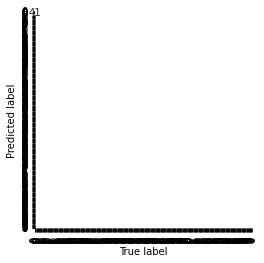

In [21]:
# visualise the confusion matrix using heatmap graph
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=df_std.final,
            yticklabels=df_std.final)

plt.xlabel('True label')
plt.ylabel('Predicted label')

In [ ]:
#hyper-parameter tunning


In [4]:
import numpy as np
a=np.array([(1,2,3,4),(3,4,5,6)])
print(a[0,2])

3
